In [1]:
!pip install POT

# 1D Wasserstein barycenter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [3]:
# Generate the data

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
first_dist = gauss(n, m=30, s=5)  # m = mean, s = std
second_dist = gauss(n, m=60, s=10)

# Create a matrix that containing all distributions

D = np.vstack((first_dist,second_dist)).T
num_dist = D.shape[1]

# Define matrix cost OT
C = ot.utils.dist0(n)
C = C/C.max()

In [4]:
t = 0.5
weights = np.array([t,1-t])

# l2 barycenter
bary_l2 = np.dot(D,weights)

# Wasserstein barycenter
reg = 1e-3
bary_wass = ot.bregman.barycenter(D, C, reg, weights)

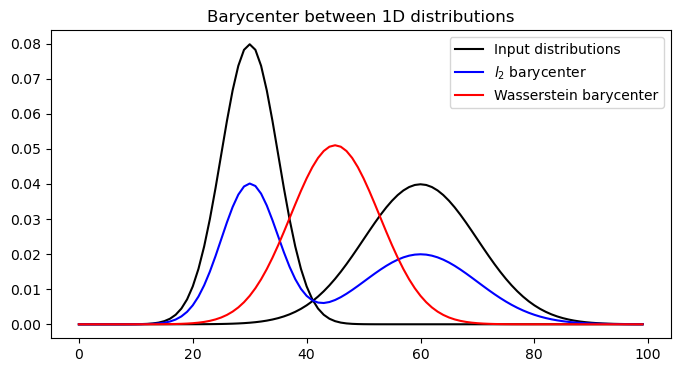

In [12]:
fig = plt.figure(figsize = (8,4))
fig.subplots_adjust(hspace=0.5)

plt.plot(x,first_dist,color='black', label='Input distributions')
plt.plot(x,second_dist,color='black')
plt.plot(x,bary_l2,label='$l_2$ barycenter',color='blue')
plt.plot(x,bary_wass,label='Wasserstein barycenter',color='red')
plt.title('Barycenter between 1D distributions')
plt.legend()


# axs[1].plot(x,bary_l2,label='l2',color='blue')
# axs[1].plot(x,bary_wass,label='Wasserstein',color='red')
# axs[1].set_title('Barycenter between distriutions')
# axs[1].legend()

plt.show()

# Two dimensional case

Text(0.5, 1.0, 'Distributions')

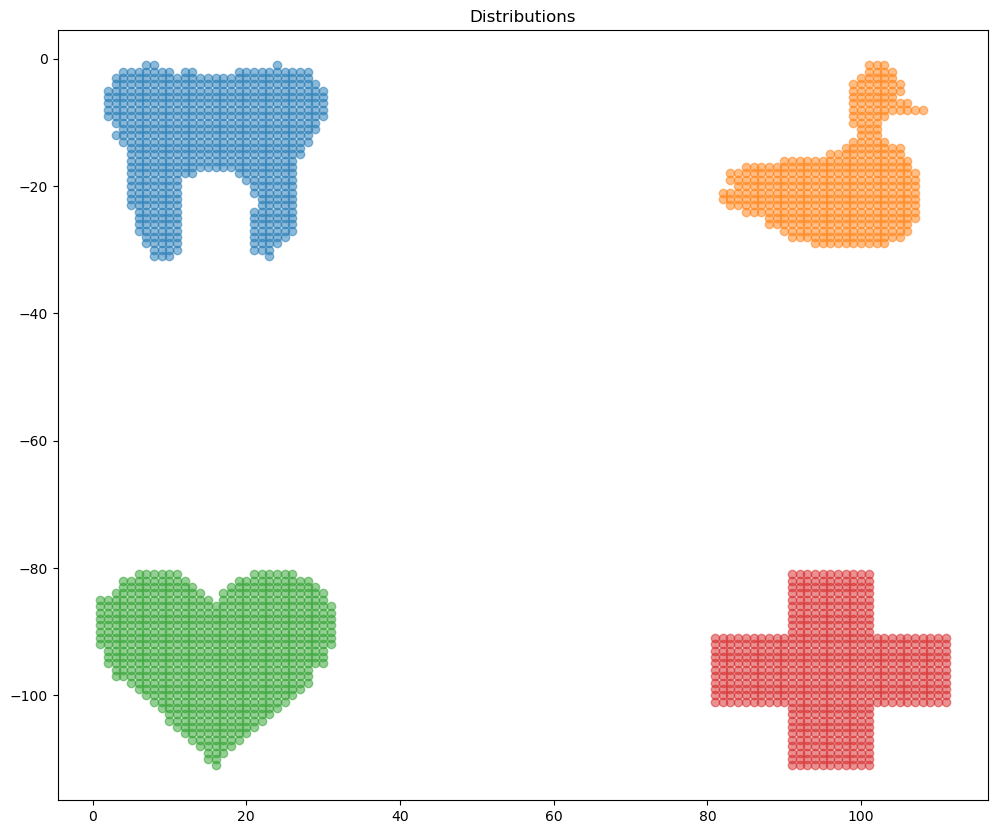

In [6]:
import numpy as np
import matplotlib.pylab as pl
import ot

d = 2
N = 2

I1 = pl.imread('data-pot/tooth.png').astype(np.float64)[::4, ::4, 2]
I2 = pl.imread('data-pot/duck.png').astype(np.float64)[::4, ::4, 2]
I3 = pl.imread('data-pot/heart.png').astype(np.float64)[::4, ::4, 2]
I4 = pl.imread('data-pot/redcross.png').astype(np.float64)[::4, ::4, 2]

sz = I2.shape[0]
XX, YY = np.meshgrid(np.arange(sz), np.arange(sz))

x1 = np.stack((XX[I1 == 0], -YY[I1 == 0]), 1) * 1.0
x2 = np.stack((XX[I2 == 0]+80, -YY[I2 == 0]), 1) * 1.0
x3 = np.stack((XX[I3 == 0], -YY[I3 == 0] - 80), 1) * 1.0
x4 = np.stack((XX[I4 == 0]+80, -YY[I4 == 0] - 80), 1) * 1.0


measures_locations_12 = [x1, x2]
measures_locations_13 = [x1, x3]
measures_locations_24 = [x2, x4]
measures_locations_34 = [x3, x4]
measures_locations_1234 = [x1, x2, x3, x4]


measures_weights_12 = [ot.unif(x1.shape[0]), ot.unif(x2.shape[0])]
measures_weights_13 = [ot.unif(x1.shape[0]), ot.unif(x3.shape[0])]
measures_weights_24 = [ot.unif(x2.shape[0]), ot.unif(x4.shape[0])]
measures_weights_34 = [ot.unif(x3.shape[0]), ot.unif(x4.shape[0])]

measures_weights_1234 = [ot.unif(x1.shape[0]), ot.unif(x2.shape[0]), ot.unif(x3.shape[0]), ot.unif(x4.shape[0])]


pl.figure(1, (12, 10))
pl.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
pl.scatter(x2[:, 0], x2[:, 1], alpha=0.5)
pl.scatter(x3[:, 0], x3[:, 1], alpha=0.5)
pl.scatter(x4[:, 0], x4[:, 1], alpha=0.5)
pl.title('Distributions')

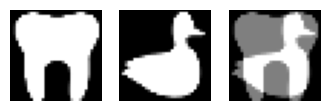

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ot

fig, axs = plt.subplots(1, 3, figsize=(4, 3))

axs[0].imshow(I1,cmap='binary')
axs[1].imshow(I2,cmap='binary')
axs[2].imshow((I1 + I2) / 2, cmap='binary')

# Turn off axis for all subplots
for ax in axs:
    ax.axis('off')


plt.show()

In [ ]:
k = 1000  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

bary_12 = ot.lp.free_support_barycenter(measures_locations_12, measures_weights_12, X_init, b)
bary_13 = ot.lp.free_support_barycenter(measures_locations_13, measures_weights_13, X_init, b)
bary_24 = ot.lp.free_support_barycenter(measures_locations_24, measures_weights_24, X_init, b)
bary_34 = ot.lp.free_support_barycenter(measures_locations_34, measures_weights_34, X_init, b)

In [ ]:
k = 1000  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

bary_1234 = ot.lp.free_support_barycenter(measures_locations_1234, measures_weights_1234, X_init, b)

<Figure size 1200x1000 with 0 Axes>

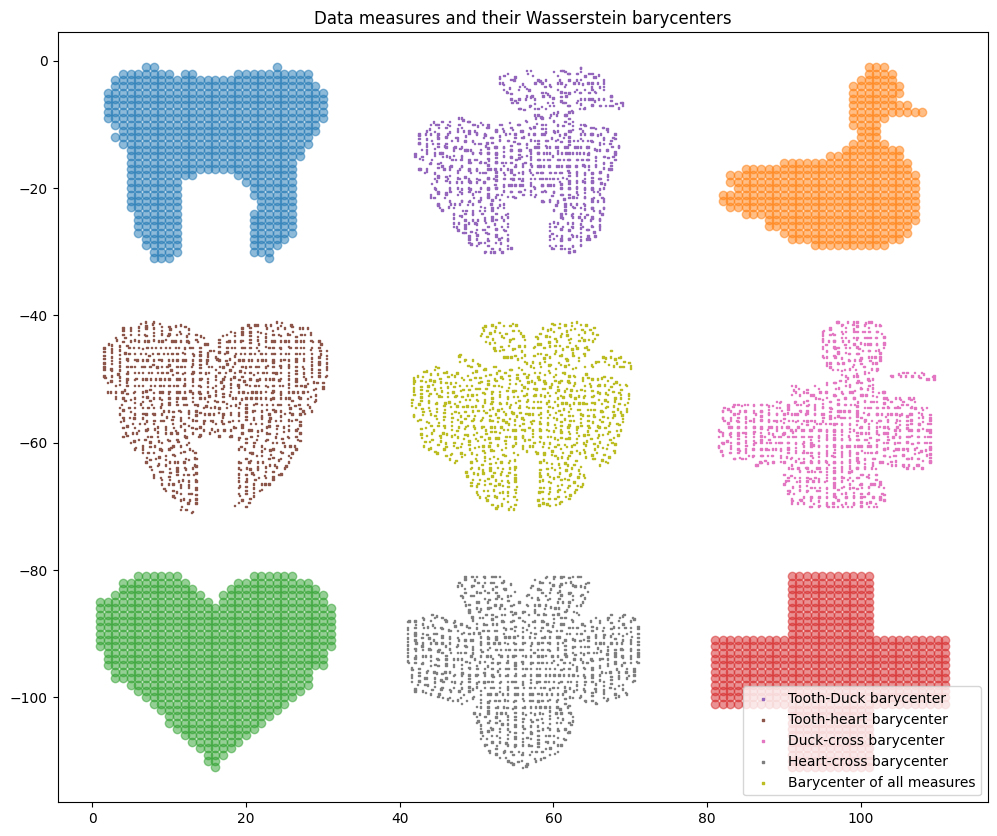

In [ ]:
pl.figure(2, (12, 10))
pl.figure(1, (12, 10))
pl.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
pl.scatter(x2[:, 0], x2[:, 1], alpha=0.5)
pl.scatter(x3[:, 0], x3[:, 1], alpha=0.5)
pl.scatter(x4[:, 0], x4[:, 1], alpha=0.5)
pl.scatter(bary_12[:, 0], bary_12[:, 1], s=b * 1000, marker='s', label='Tooth-Duck barycenter')
pl.scatter(bary_13[:, 0], bary_13[:, 1], s=b * 1000, marker='s', label='Tooth-heart barycenter')
pl.scatter(bary_24[:, 0], bary_24[:, 1], s=b * 1000, marker='s', label='Duck-cross barycenter')
pl.scatter(bary_34[:, 0], bary_34[:, 1], s=b * 1000, marker='s', label='Heart-cross barycenter')
pl.scatter(bary_1234[:, 0], bary_1234[:, 1], s=b * 1000, marker='s', label='Barycenter of all measures')


pl.title('Data measures and their Wasserstein barycenters')
pl.legend(loc="lower right")
pl.show()

In [ ]:
temp = np.ones((32,32))
bary_12_ = bary_12
bary_12_[:,1] = -bary_12_[:,1]
for i in bary_12_:
    temp[int(i[1]),int(i[0]-40)] = 0

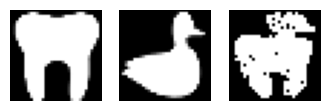

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(4,3))
axs[0].imshow(I1,cmap='binary')
axs[1].imshow(I2,cmap='binary')
axs[2].imshow(temp,cmap='binary')

for ax in axs:
    ax.axis('off')
plt.show()